In [94]:
from pathlib import Path
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import transformations as tf

In [194]:
TRANSF = 'timestretch'

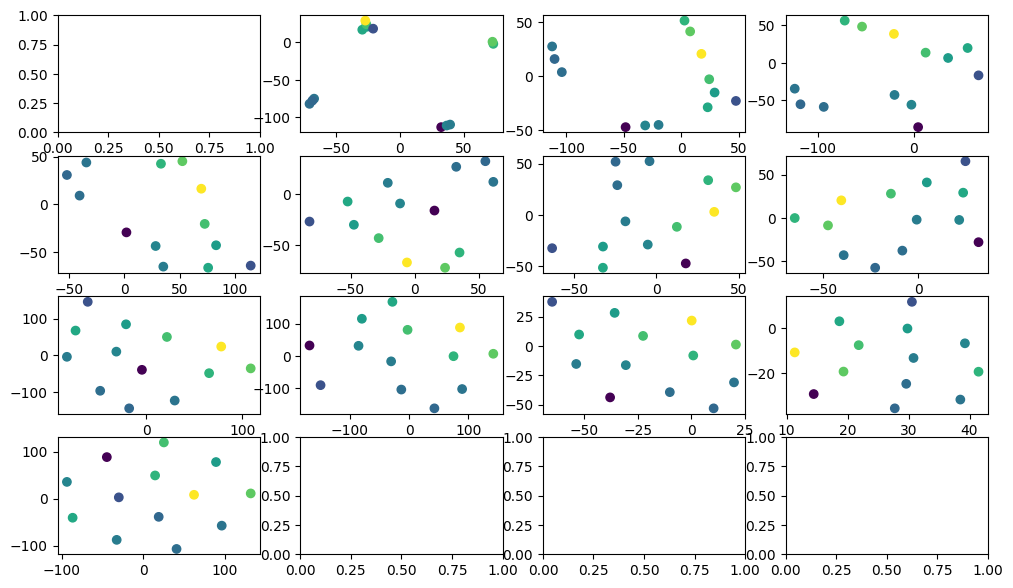

In [201]:
df = pd.read_csv("metadata.csv")
files = list(set(df["file"]))[3:4]

fig, axes = plt.subplots(4, 4, figsize=(12,7))
axes = axes.flatten()

for i in range(1,13):
    for file in files:
        embeds = []
        labels = []
        tracks = []
        embeds_id = df[ (df["transf"]=="identity") &
                    (df["file"]==file) ]["file_embeds_path"]
        if len(embeds_id==0):
            embeds.append(np.load(embeds_id.iloc[0])[0])
            labels.append(0)
            tracks.append(df[df["transf"]=="identity"]["file"].iloc[0])
        embeds_df = df[ (df["transf"]==TRANSF) &
                    (df["file"]==file)]
        for _, row in embeds_df.iterrows():
            embeds.append(np.load(row["file_embeds_path"])[0])
            labels.append(float(row["transf_param_name"]))
            tracks.append(row["file"])
        
        tsne = TSNE(n_components=2, perplexity=i)
        x = np.vstack(embeds)
        x2d = tsne.fit_transform(x)

        axes[i].scatter(x2d[:,0], x2d[:,1], c=labels)
        
        # plt.text(x2d[0,0], x2d[0,1], "O")

plt.show()

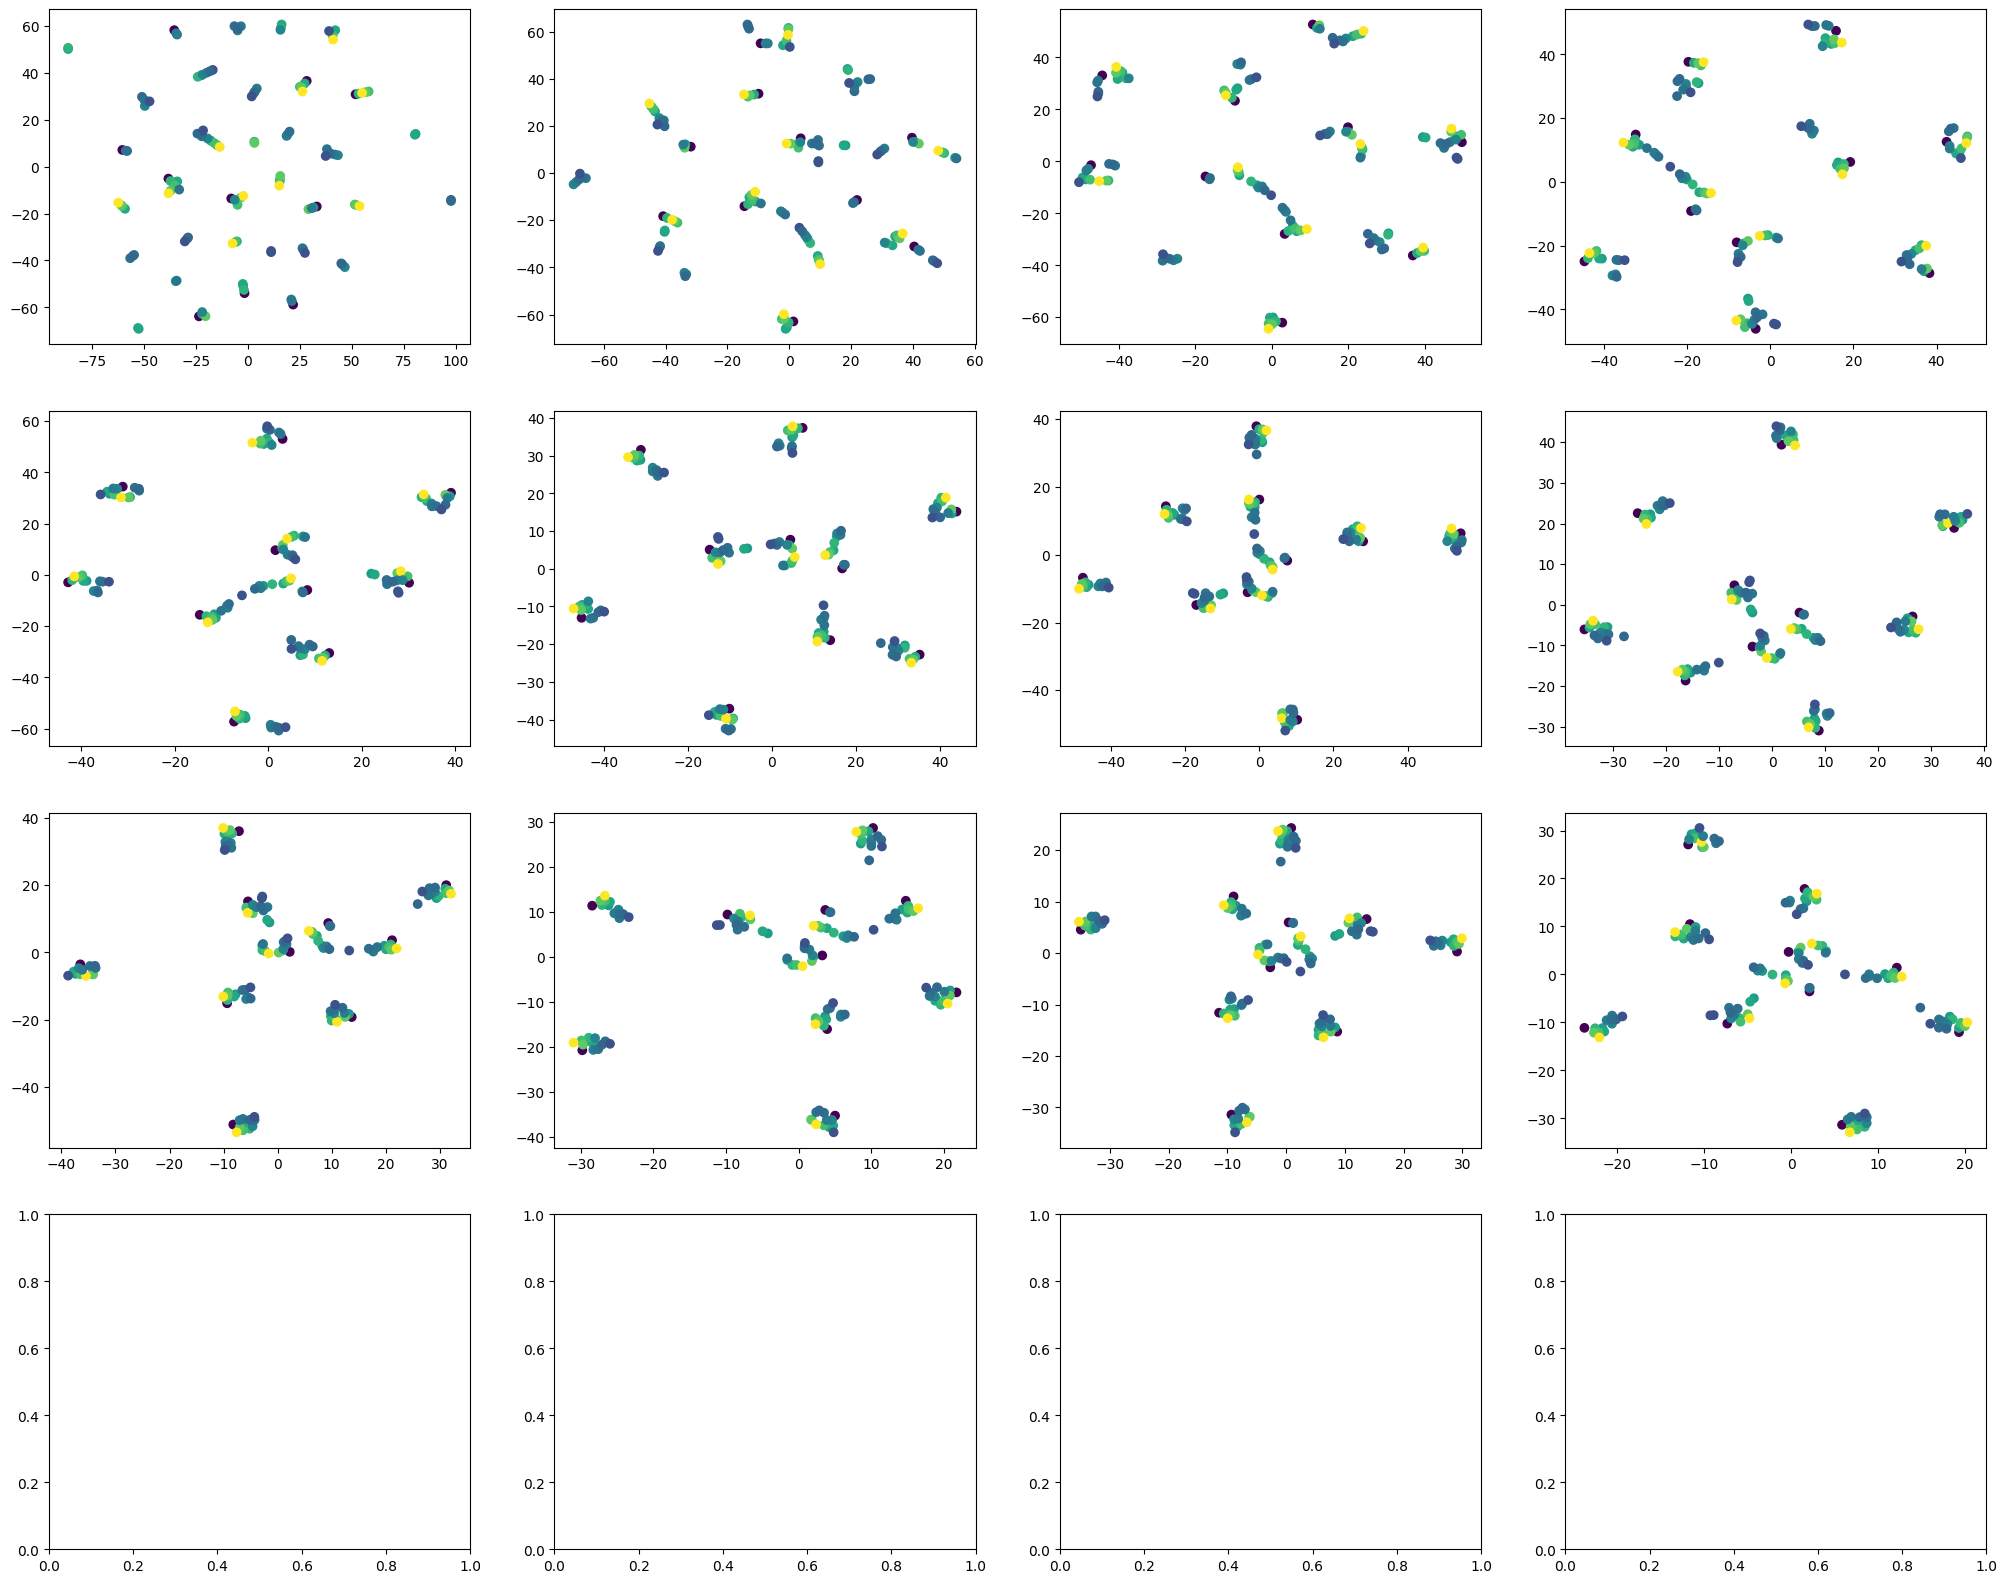

In [202]:
cmap_list = ["Greys", "Purples",
"Blues", "Greens",
"Oranges",
"Reds",
"YlOrBr",
"YlOrRd",
"OrRd",
"PuRd",
"RdPu",
"BuPu",
"GnBu",
"PuBu",
"YlGnBu",
"PuBuGn",
"BuGn",]

df = pd.read_csv("metadata.csv")

files = list(set(df["file"]))

fig, axes = plt.subplots(4, 4, figsize=(25,20))
axes = axes.flatten()

for i, p in enumerate(range(1,13)):
    tsne = TSNE(n_components=2, perplexity=p)
    embeds = []
    labels = []
    tracks = []
    for c, file in enumerate(files):
        embeds_id = df[(df["transf"]=="identity") & 
                       (df["file"]==file)]
        if len(embeds_id==0):
            embeds.append(np.load(embeds_id["file_embeds_path"].iloc[0])[0])
            labels.append(0)
            tracks.append(embeds_id["file"])
        embeds_df = df[(df["transf"]==TRANSF) &
                       (df["file"]==file)]
        for _, row in embeds_df.iterrows():
            embeds.append(np.load(row["file_embeds_path"])[0])
            labels.append(float(row["transf_param_name"]))
            tracks.append(row["file"])    

    x = np.vstack(embeds)
    x2d = tsne.fit_transform(x)

    axes[i].scatter(x2d[:,0], x2d[:,1], c=labels)        
    # axes[i].text(x2d[0,0], x2d[0,1], "O")    

plt.show()